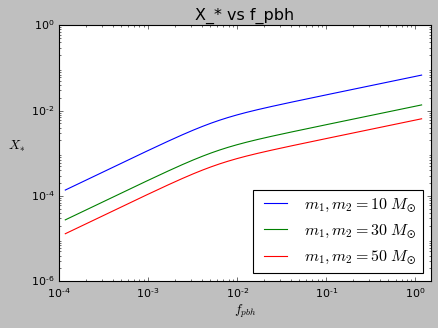

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import matplotlib.ticker as ticker
import math



σ_eq=0.005
K=0.032
t=13.78e9
t_0=13.78e9



m_1_list=[10,30,50]
m_2_list=[10,30,50]

α = 1.6
M=5
Δ=20

def m_b(m_1,m_2):
    return (m_1+m_2)


def g(f):
    return  ((f**2 + σ_eq**2)**(-21/74))


def P(m): #Powerlaw PBH mass distribution
    return ((α-1)/M)*((m/M)**(-α))


def f_i(f,m_1):
    return (f*P(m_1))

def f_j(f,m_2):
    return (f*P(m_2))

def f_b(m_1,m_2,f):
    return (f_i(f,m_1)+f_j(f,m_2))

def X(f,m_1,m_2):
    return (K*g(f)*f_b(m_1,m_2,f)*((m_1*m_2)**(3/37))*(m_b(m_1,m_2)**(-1/37))*((t/t_0)**(3/37))*Δ)


f=np.geomspace(1e-4,1,10000)
f_pbh=(f/0.85)


plt.style.use('classic')
fig,ax= plt.subplots(figsize=(6, 4))

for i, (m_1,m_2) in enumerate(zip(m_1_list,m_2_list)):
    ax.loglog(f_pbh, X(f,m_1,m_2),'')
    


ax.xaxis.set_major_locator(ticker.LogLocator(base=10))
ax.yaxis.set_major_locator(ticker.LogLocator(base=100))

plt.rc('lines',linewidth=1.3)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


plt.xlim(1e-4,1.5)


plt.xlabel('$f_{pbh}$',fontsize=12,labelpad=3)
plt.ylabel('$X_{*}$',fontsize=12,rotation=360,labelpad=13)
plt.legend(["$m_{1},m_{2}=10\hspace{0.3} M_{☉} $","$m_{1},m_{2}=30\hspace{0.3} M_{☉}$","$m_{1},m_{2}=50\hspace{0.3}M_{☉}$"],loc='lower right')
plt.title('X_* vs f_pbh')
plt.savefig("X_{*} vs f_{pbh}_Yacine Ali.pdf")
plt.show()

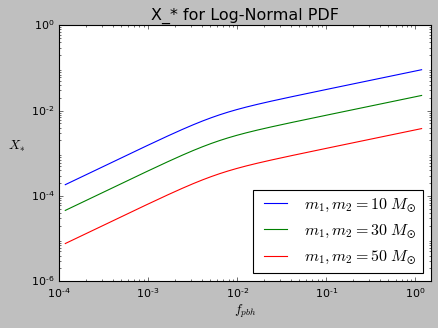

In [3]:
π=np.pi
σ = 0.6
m_c=15


def P(m):           #Log-Normal PBH mass Distributions
    return (1/((math.sqrt(2*π))*σ*m))*math.exp(-(((math.log(m/m_c))**2)/(2*(σ**2))))  


def X_12(f,m_1,m_2):
    return (K*g(f)*f_b(m_1,m_2,f)*((m_1*m_2)**(3/37))*(m_b(m_1,m_2)**(-1/37))*((t/t_0)**(3/37))*Δ)


plt.style.use('classic')
fig,ax= plt.subplots(figsize=(6, 4))

for i, (m_1,m_2) in enumerate(zip(m_1_list,m_2_list)):
    ax.loglog(f_pbh, X_12(f,m_1,m_2),'')
    


ax.xaxis.set_major_locator(ticker.LogLocator(base=10))
ax.yaxis.set_major_locator(ticker.LogLocator(base=100))

plt.rc('lines',linewidth=1.3)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


plt.xlim(1e-4,1.5)


plt.xlabel('$f_{pbh}$',fontsize=12,labelpad=3)
plt.ylabel('$X_{*}$',fontsize=12,rotation=360,labelpad=13)
plt.legend(["$m_{1},m_{2}=10\hspace{0.3} M_{☉} $","$m_{1},m_{2}=30\hspace{0.3} M_{☉}$","$m_{1},m_{2}=50\hspace{0.3}M_{☉}$"],loc='lower right')
plt.title('X_* for Log-Normal PDF')
plt.savefig("X_{*} vs f_{pbh}_Yacine Ali.pdf")
plt.show()

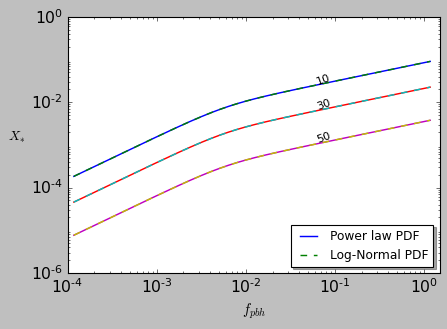

In [25]:
fig, ax = plt.subplots(1, figsize=(6, 4))
plt.rc('lines', linewidth=1.3)    
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

for i, (m_1,m_2) in enumerate(zip(m_1_list,m_2_list)):
    ax.loglog(f_pbh, X(f,m_1,m_2),'')
    ax.loglog(f_pbh, X_12(f,m_1,m_2),'--')
    ax.text(0.06,X(0.06,m_1,m_2),m_1,rotation=20,size=10)
    

ax.xaxis.set_major_locator(ticker.LogLocator(base=10))
ax.yaxis.set_major_locator(ticker.LogLocator(base=100))


plt.xlim(1e-4,1.5)        
    
    
plt.xlabel('$f_{pbh}$',fontsize=13)
plt.ylabel('$X_{*}$',fontsize=12,rotation=360,labelpad=13)
plt.legend(["Power law PDF","Log-Normal PDF"], prop = {'size':11}, facecolor = 'white',loc='lower right',shadow = True,fontsize=33)
plt.show()

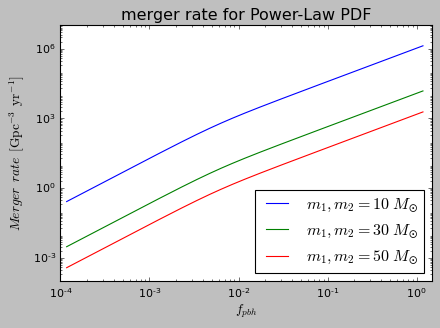

In [17]:
# Merger Rate  for Power Law PDF for PBH masses.

k=3.9e6



def P(m): #Powerlaw PBH mass distribution
    return ((α-1)/M)*((m/M)**(-α))

def h(m_1,m_2):
    return (((m_1*m_2)**(3/37))*(m_b(m_1,m_2)**(36/37))*((t/t_0)**(-34/37)))


def merger_rate(f,m_1,m_2):
    return (k*g(f)*(f**2)*h(m_1,m_2)*((P(m_1)/m_1)+(P(m_2)/m_2))*(np.minimum((P(m_1)/m_1),(P(m_2)/m_2)))*(Δ**2))



f=np.geomspace(1e-4,1,10000)
f_pbh=(f/0.85)


plt.style.use('classic')
fig,ax= plt.subplots(figsize=(6, 4))
for i, (m_1,m_2) in enumerate(zip(m_1_list,m_2_list)):
    ax.loglog(f_pbh, merger_rate(f,m_1,m_2),'')
    


ax.xaxis.set_major_locator(ticker.LogLocator(base=10))
ax.yaxis.set_major_locator(ticker.LogLocator(base=1000))

plt.rc('lines',linewidth=1.3)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


plt.xlim(1e-4,1.5)
plt.ylim(1e-4,1e7)

plt.xlabel('$f_{pbh}$',fontsize=12,labelpad=3)
plt.ylabel('$Merger\hspace{0.5} rate\hspace{0.5}[\mathrm{Gpc^{-3}\hspace{0.5}yr^{-1}}]$',fontsize=12)
plt.title('Merger rate')
plt.legend(["$m_{1},m_{2}=10\hspace{0.3} M_{☉} $","$m_{1},m_{2}=30\hspace{0.3} M_{☉}$","$m_{1},m_{2}=50\hspace{0.3}M_{☉}$"],loc='lower right')
plt.title('merger rate for Power-Law PDF')
plt.savefig("Merger rate vs f_{pbh}_Chinese paper.pdf")
plt.show()

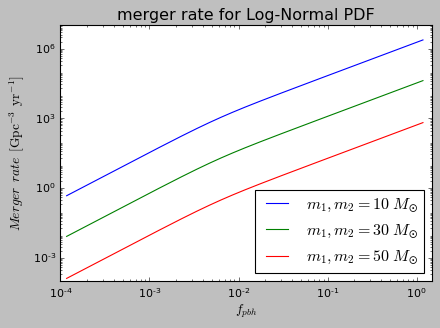

In [18]:
# Merger rate for Log-Normal PBH PDF



def P(m):           #Log-Normal PBH mass Distributions
    return (1/((math.sqrt(2*π))*σ*m))*math.exp(-(((math.log(m/m_c))**2)/(2*(σ**2))))  



def merger_rate_12(f,m_1,m_2):
    return (k*g(f)*(f**2)*h(m_1,m_2)*((P(m_1)/m_1)+(P(m_2)/m_2))*(np.minimum((P(m_1)/m_1),(P(m_2)/m_2)))*(Δ**2))



plt.style.use('classic')
fig,ax= plt.subplots(figsize=(6, 4))
for i, (m_1,m_2) in enumerate(zip(m_1_list,m_2_list)):
    ax.loglog(f_pbh, merger_rate_12(f,m_1,m_2),'')
    


ax.xaxis.set_major_locator(ticker.LogLocator(base=10))
ax.yaxis.set_major_locator(ticker.LogLocator(base=1000))

plt.rc('lines',linewidth=1.3)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


plt.xlim(1e-4,1.5)
plt.ylim(1e-4,1e7)

plt.xlabel('$f_{pbh}$',fontsize=12,labelpad=3)
plt.ylabel('$Merger\hspace{0.5} rate\hspace{0.5}[\mathrm{Gpc^{-3}\hspace{0.5}yr^{-1}}]$',fontsize=12)
plt.title('Merger rate')
plt.legend(["$m_{1},m_{2}=10\hspace{0.3} M_{☉} $","$m_{1},m_{2}=30\hspace{0.3} M_{☉}$","$m_{1},m_{2}=50\hspace{0.3}M_{☉}$"],loc='lower right')
plt.title('merger rate for Log-Normal PDF')
plt.savefig("Merger rate vs f_{pbh}_Chinese paper.pdf")
plt.show()

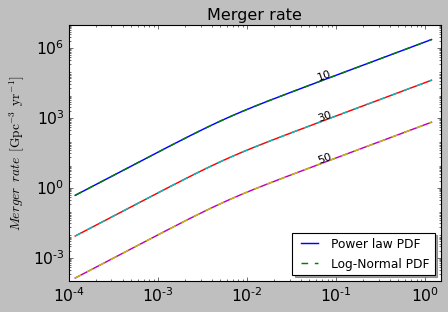

In [29]:
fig, ax = plt.subplots(1, figsize=(6, 4))
plt.rc('lines', linewidth=1.3)    
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

for i, (m_1,m_2) in enumerate(zip(m_1_list,m_2_list)):
    ax.loglog(f_pbh, merger_rate(f,m_1,m_2),'')
    ax.loglog(f_pbh, merger_rate_12(f,m_1,m_2),'--')
    ax.text(0.06,merger_rate(0.06,m_1,m_2),m_1,rotation=20,size=10)
    

ax.xaxis.set_major_locator(ticker.LogLocator(base=10))
ax.yaxis.set_major_locator(ticker.LogLocator(base=1000))


plt.xlim(1e-4,1.5)        
plt.ylim(1e-4,1e7)    
    
plt.ylabel('$Merger\hspace{0.5} rate\hspace{0.5}[\mathrm{Gpc^{-3}\hspace{0.5}yr^{-1}}]$',fontsize=12)
plt.title('Merger rate')
plt.legend(["Power law PDF","Log-Normal PDF"], prop = {'size':11}, facecolor = 'white',loc='lower right',shadow = True,fontsize=33)
plt.show()